<a href="https://colab.research.google.com/github/Alfahad12/Air-Quality-Index-Bucket-Prediction/blob/main/proj_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Importing the required libraries
import pandas as pd               
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/data/city_day.csv')

In [5]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
df.head(7)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN


In [7]:
df=df.drop(['Date'],axis=1)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df=df.drop(['Xylene','PM10','NH3','Toluene'],axis=1)
df.head()

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
0,Ahmedabad,NaN,0.92,18.22,17.15,0.92,27.64,133.36,0.00,NaN,NaN
1,Ahmedabad,NaN,0.97,15.69,16.46,0.97,24.55,34.06,3.68,NaN,NaN
2,Ahmedabad,NaN,17.40,19.30,29.70,17.40,29.07,30.70,6.80,NaN,NaN
3,Ahmedabad,NaN,1.70,18.48,17.97,1.70,18.59,36.08,4.43,NaN,NaN
4,Ahmedabad,NaN,22.10,21.42,37.76,22.10,39.33,39.31,7.01,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   NO          25949 non-null  float64
 3   NO2         25946 non-null  float64
 4   NOx         25346 non-null  float64
 5   CO          27472 non-null  float64
 6   SO2         25677 non-null  float64
 7   O3          25509 non-null  float64
 8   Benzene     23908 non-null  float64
 9   AQI         24850 non-null  float64
 10  AQI_Bucket  24850 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.5+ MB


In [10]:
df.shape

(29531, 11)

In [11]:
df.isnull().sum()

City             0
PM2.5         4598
NO            3582
NO2           3585
NOx           4185
CO            2059
SO2           3854
O3            4022
Benzene       5623
AQI           4681
AQI_Bucket    4681
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.shape

(19313, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


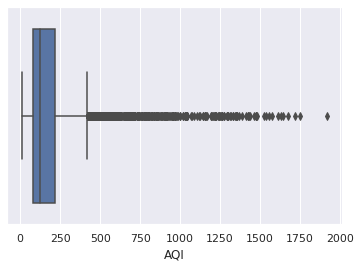

In [14]:
sns.boxplot(df['AQI'])

In [15]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

PM2.5       52.25
NO          15.36
NO2         26.89
NOx         27.72
CO           0.87
SO2          9.18
O3          26.24
Benzene      3.11
AQI        135.00
dtype: float64


In [16]:
df

,City,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
28,Ahmedabad,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,Poor
29,Ahmedabad,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,Very Poor
30,Ahmedabad,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0,Severe
31,Ahmedabad,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0,Severe
32,Ahmedabad,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,Good
29526,Visakhapatnam,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
29527,Visakhapatnam,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
29528,Visakhapatnam,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [17]:
df.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
count,19313.000000,19313.000000,19313.000000,19313.000000,19313.000000,19313.000000,19313.000000,19313.000000,19313.000000
mean,68.607708,18.612958,31.704599,34.557708,2.481799,14.700931,35.464880,3.582733,171.709315
std,61.509010,22.580486,25.053274,31.318282,7.442268,17.506156,21.369494,16.745132,145.080157
min,0.990000,0.030000,0.030000,0.000000,0.000000,0.010000,0.010000,0.000000,14.000000
25%,30.360000,6.060000,14.410000,15.160000,0.610000,6.150000,20.130000,0.260000,83.000000
50%,50.320000,10.650000,25.220000,25.590000,0.940000,9.730000,31.950000,1.320000,121.000000
75%,82.610000,21.420000,41.300000,42.880000,1.480000,15.330000,46.370000,3.370000,218.000000
max,685.360000,246.660000,277.310000,293.100000,175.810000,186.080000,257.730000,455.030000,1917.000000


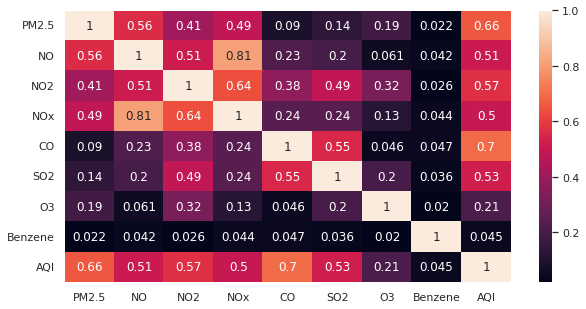

In [18]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,annot=True)

In [19]:
df=df.drop(['PM2.5'],axis=1)

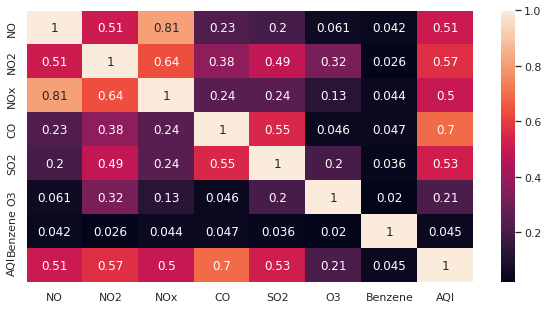

In [20]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,annot=True)

In [21]:
df

,City,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
28,Ahmedabad,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,Poor
29,Ahmedabad,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,Very Poor
30,Ahmedabad,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0,Severe
31,Ahmedabad,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0,Severe
32,Ahmedabad,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,Good
29526,Visakhapatnam,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
29527,Visakhapatnam,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
29528,Visakhapatnam,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory


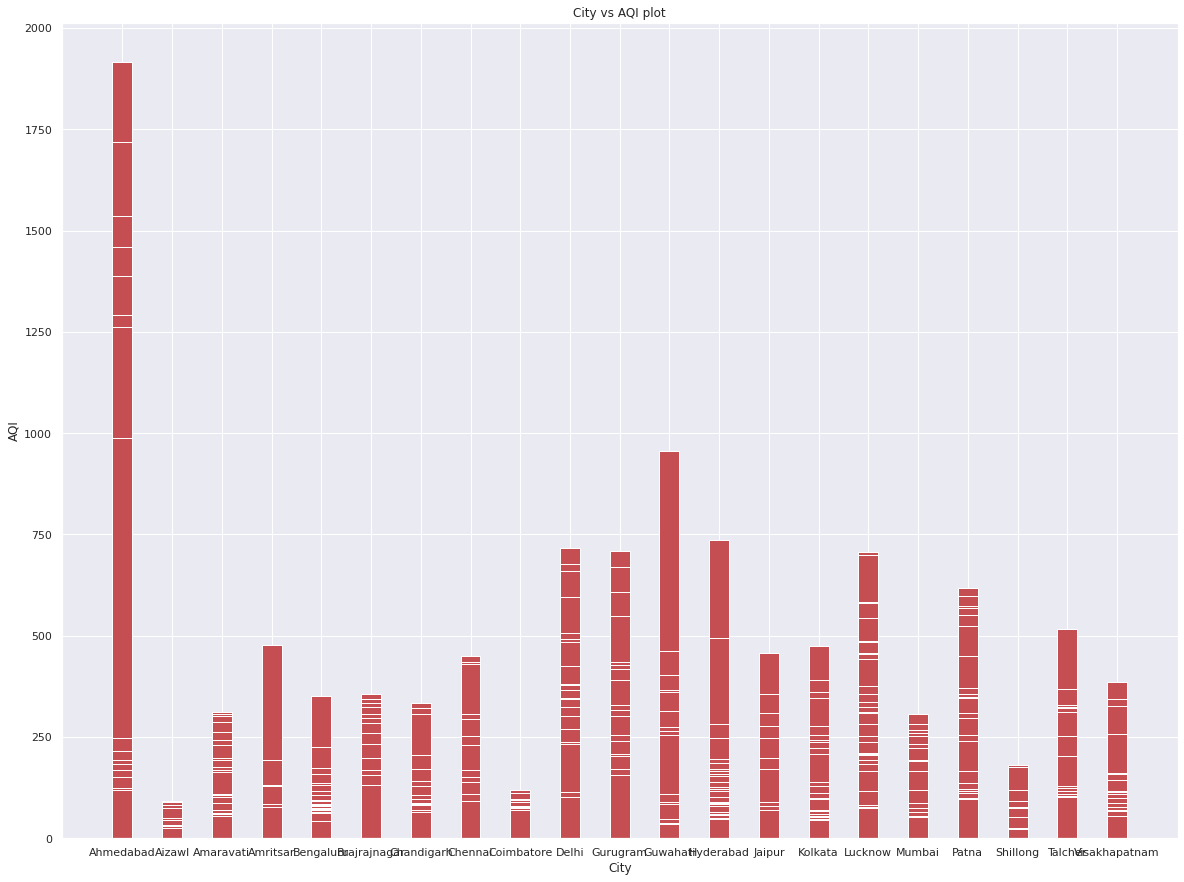

In [25]:
fig = plt.figure(figsize = (20, 15))

plt.bar(df['City'],df['AQI'],color='R',width=0.4)
 
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("City vs AQI plot")
plt.show()

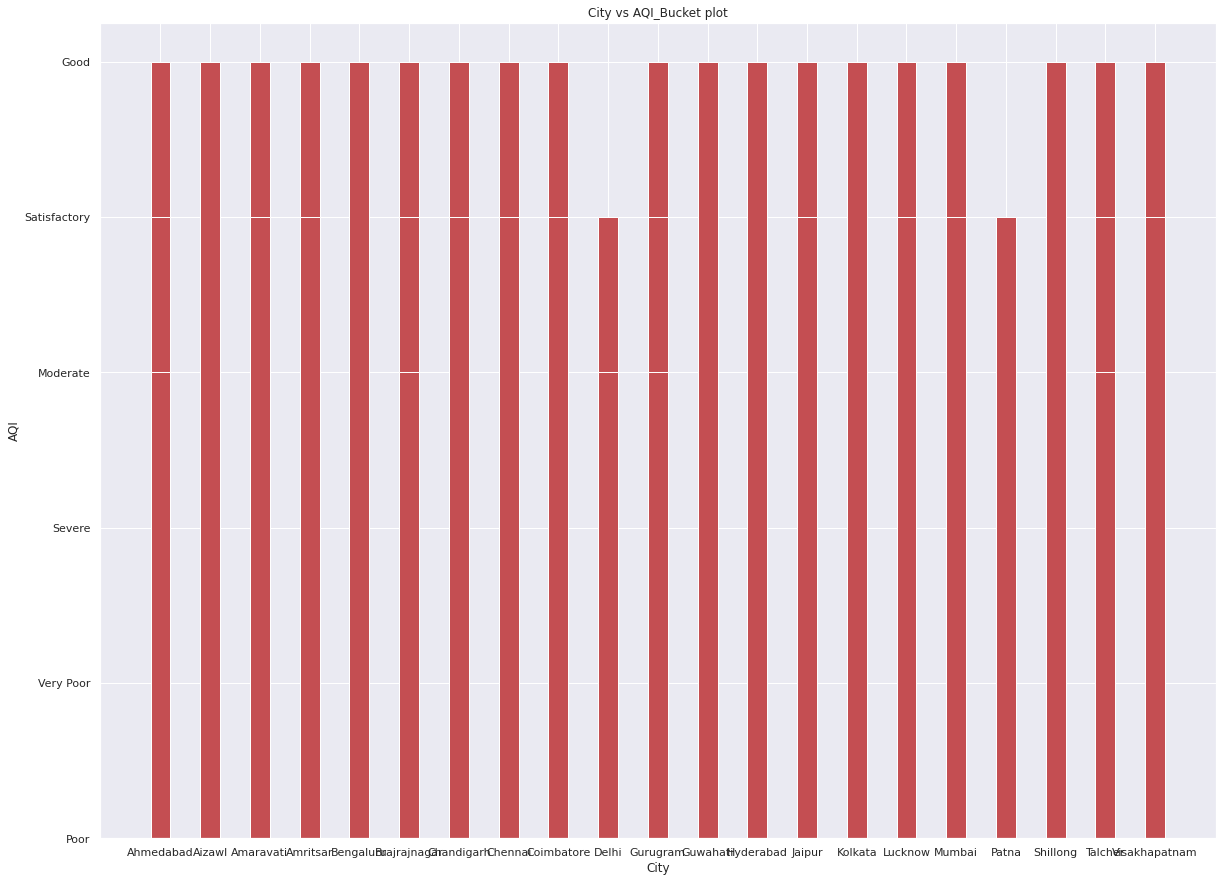

In [26]:
fig = plt.figure(figsize = (20, 15))

plt.bar(df['City'],df['AQI_Bucket'],color='R',width=0.4)
 
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("City vs AQI_Bucket plot")
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [31]:
x=df.iloc[:,[1,2,3,4,5,6,7,8]].values
y=df.iloc[:,9].values

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [57]:
classifier=KNeighborsClassifier(n_neighbors=25,metric='minkowski') #considered n=25 according to the graph below
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [58]:
y_pred=classifier.predict(x_test)

In [59]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['Satisfactory' 'Satisfactory']
 ['Very Poor' 'Very Poor']
 ['Moderate' 'Moderate']
 ...
 ['Very Poor' 'Very Poor']
 ['Satisfactory' 'Satisfactory']
 ['Satisfactory' 'Moderate']]


In [60]:
accuracy_score(y_test,y_pred)

0.82861580945806

In [61]:
y_train_pred=classifier.predict(x_train)
metrics.accuracy_score(y_train, y_train_pred) 

0.8511724239958577

In [38]:
from sklearn.model_selection import KFold
model=KNeighborsClassifier()
kfold_validation=KFold(10)

In [39]:
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.94927536 0.96066253 0.9684265  0.96633868 0.96271362 0.96167789
 0.97151735 0.96841015 0.9352667  0.94355256]
0.9587841344179578


In [ ]:
accuracy_rate=[]
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score)
print(accuracy_rate)

In [ ]:
accuracy_rate=[]
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.920364827758496, 0.9170514746325882, 0.9280278296895054, 0.9266306090130195, 0.9312381992402482, 0.9322741196539408, 0.9357428595016689, 0.9346557153471796, 0.9369333893015022, 0.9373476288045219, 0.9385902132901884, 0.9387976010884843, 0.9398331462366768, 0.9405581859880151, 0.9412311442488418, 0.9416458126267193, 0.9419564788516446, 0.9422156800936662, 0.9416973848283376, 0.9427332784373516, 0.9430955704732528, 0.9438207710526626, 0.944286502343265, 0.9444935952900962, 0.9448558873259975, 0.9450632483196146, 0.9454254599414801, 0.9460470068287599, 0.9453216722259571, 0.9459431923085584, 0.9468751105692993, 0.9459431118945225, 0.9449591657526272, 0.9462538853381626, 0.9457876447586667, 0.9460982573742351, 0.9465642567116236, 0.9471857231848677, 0.9460981769601993]


In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  error_rate.append(1-score.mean())


Text(0.5, 1.0, 'error_rate vs k value')

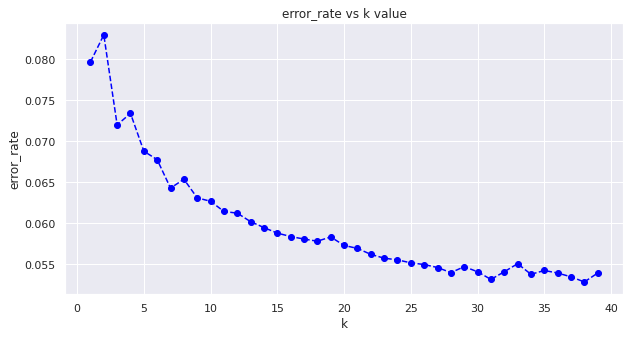

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.title('error_rate vs k value')

Text(0.5, 1.0, 'accuracy_rate vs k value')

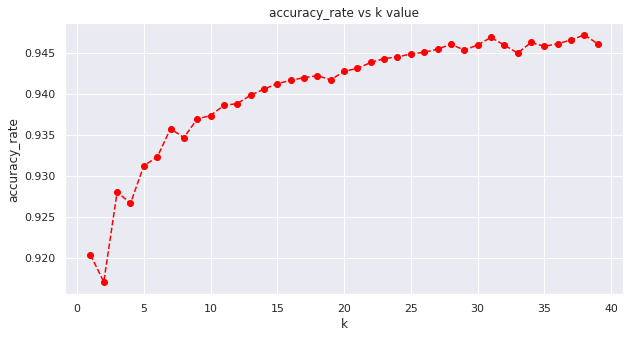

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),accuracy_rate,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy_rate')
plt.title('accuracy_rate vs k value')

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=classifier.predict(x_test)

In [47]:
from sklearn import metrics

In [48]:
print('Accuracy of the model: ', metrics.accuracy_score(y_test,y_pred))

Accuracy of the model:  0.9996548153261995


In [54]:
y_train_pred=classifier.predict(x_train)
metrics.accuracy_score(y_train, y_train_pred) 

1.0

In [49]:
model=RandomForestClassifier()
kfold_validation=KFold(10)

In [50]:
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99585921 0.9994824  0.9994824  0.99948213 0.99585707 0.99948213
 1.         0.9984464  0.99430347 1.        ]
0.9982395223191837


Got high training and testing accuracy in Random Forest Classifier
And got higher average accuracy in random forest classifier 